In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("Files/1. newyork_airbnb_data.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#Checking for null values

df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#Filling missing values in the "name" column

df["name"].fillna("No Name", inplace = True)

In [8]:
#Dropping unnecessary columns for our EDA

df.drop(columns = ["host_name", "last_review"], inplace = True)

In [9]:
#Filling "reviews_per_month" missing values with 0

df["reviews_per_month"].fillna(0, inplace = True)

In [10]:
#Unique values in categorical columns

print ("Unique Neighbourhood Groups:", df["neighbourhood_group"].unique())
print("\n")
print("Unique Room Types:", df["room_type"].unique())
print("\n")
print("Unique Neighbourhoods:", len(df["neighbourhood"].unique()),"neighbourhoods")

Unique Neighbourhood Groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


Unique Room Types: ['Private room' 'Entire home/apt' 'Shared room']


Unique Neighbourhoods: 221 neighbourhoods


In [11]:
#Checking instances where price = 0

df[df["price"] == 0].count()

id                                11
name                              11
host_id                           11
neighbourhood_group               11
neighbourhood                     11
latitude                          11
longitude                         11
room_type                         11
price                             11
minimum_nights                    11
number_of_reviews                 11
reviews_per_month                 11
calculated_host_listings_count    11
availability_365                  11
dtype: int64

In [12]:
df.drop(df[df["price"] == 0].index, inplace = True)

## Exploratory Data Analysis

#### 1. What is the price range for the Airbnbs in the dataset?

In [13]:
print("Min Price:", df["price"].min(), "€")
print("\n")
print("Max Price:", df["price"].max(), "€")

Min Price: 10 €


Max Price: 10000 €


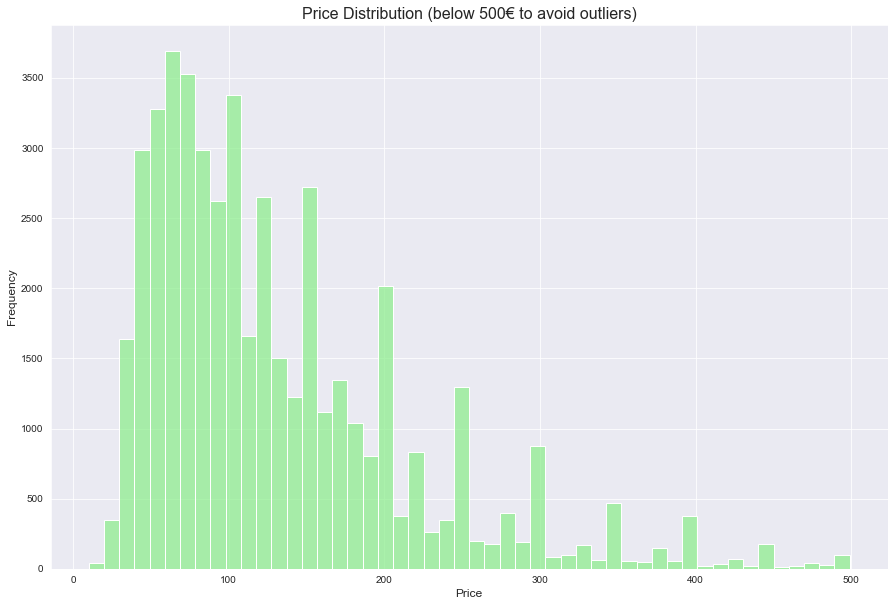

In [14]:
plt.figure(figsize = (15,10))

fig0 = sns.histplot(data = df[df["price"] < 500],
             x = "price",
             color = "lightgreen",
             bins = 50)

plt.title("Price Distribution (below 500€ to avoid outliers)", fontsize = 16)
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12);

#### 2. What is the average price per neighbourhood group? 

In [15]:
ngroup_price = pd.DataFrame(round(df.groupby(by = "neighbourhood_group")["price"].mean().sort_values(ascending = False),2)).reset_index()

ngroup_price

,neighbourhood_group,price
0,Manhattan,196.88
1,Brooklyn,124.44
2,Staten Island,114.81
3,Queens,99.52
4,Bronx,87.58


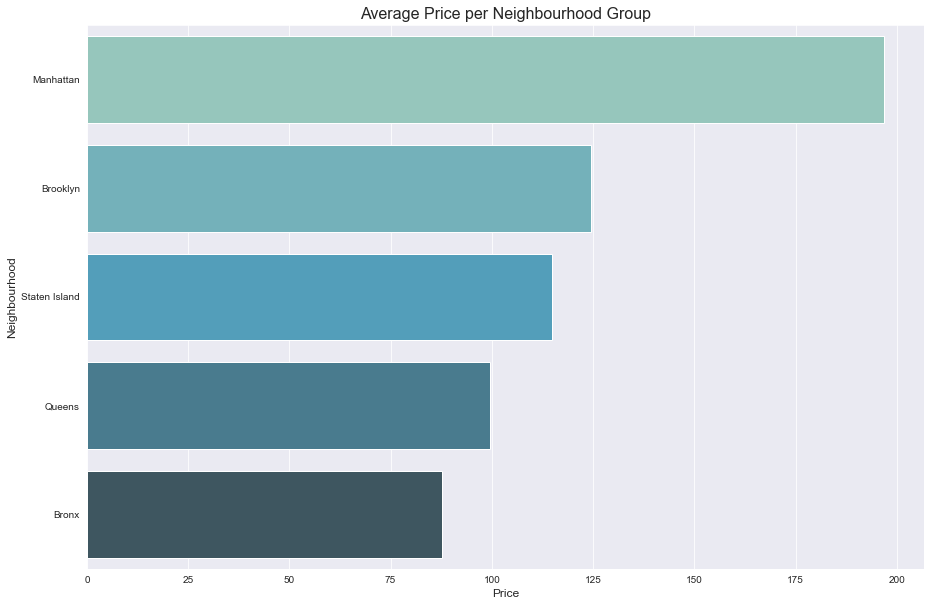

In [16]:
#Visualizing the average price per neighbourhood group

plt.figure(figsize = (15,10))

sns.barplot(data = ngroup_price,
            orient = "h",
            x = "price",
            y = "neighbourhood_group",
            palette = "GnBu_d")

plt.title("Average Price per Neighbourhood Group", fontsize = 16)
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Neighbourhood", fontsize = 12);

#### 3. What are the top 10 most expensive neighbourhoods? And the least expensive?


In [17]:
nb_top10_price = pd.DataFrame(round(df.groupby(by = "neighbourhood")["price"].mean().sort_values(ascending = False),2)[:10]).reset_index()

nb_top10_price

,neighbourhood,price
0,Fort Wadsworth,800.00
1,Woodrow,700.00
2,Tribeca,490.64
3,Sea Gate,487.86
4,Riverdale,442.09
5,Prince's Bay,409.50
6,Battery Park City,367.56
7,Flatiron District,341.92
8,Randall Manor,336.00
9,NoHo,295.72


In [18]:
nb_bottom10_price = pd.DataFrame(round(df.groupby(by = "neighbourhood")["price"].mean().sort_values(ascending = True),2)[:10]).reset_index()

nb_bottom10_price

,neighbourhood,price
0,Bull's Head,47.33
1,Hunts Point,50.50
2,Tremont,51.55
3,Soundview,53.47
4,New Dorp,57.00
5,Bronxdale,57.11
6,New Dorp Beach,57.40
7,Grant City,57.67
8,Concord,58.19
9,Mount Eden,58.50


Text(0, 0.5, 'Neighbourhood')

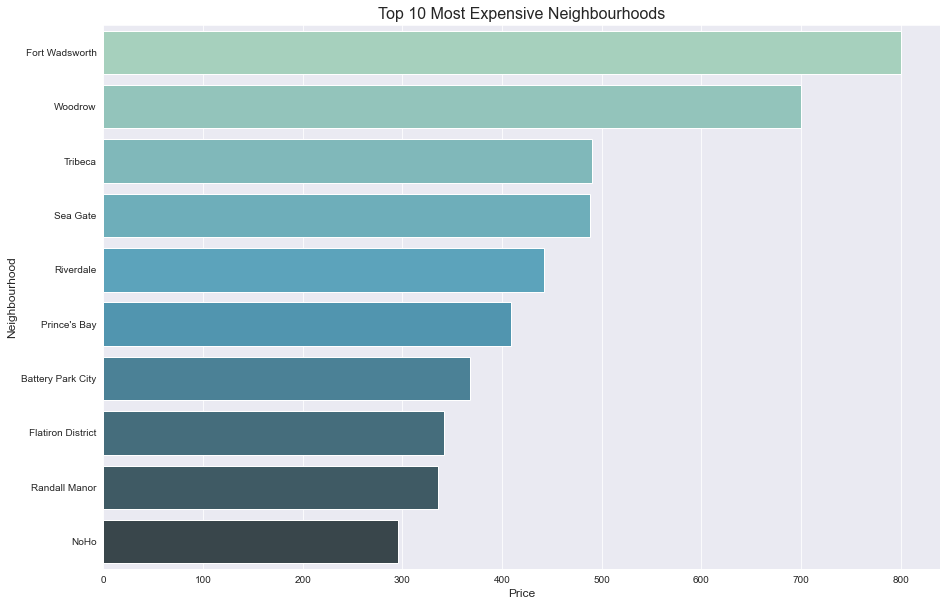

In [19]:
plt.figure(figsize = (15,10))

sns.barplot(data = nb_top10_price,
            orient = "h",
            x = "price",
            y = "neighbourhood",
            palette = "GnBu_d")

plt.title("Top 10 Most Expensive Neighbourhoods", fontsize = 16)
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Neighbourhood", fontsize = 12)

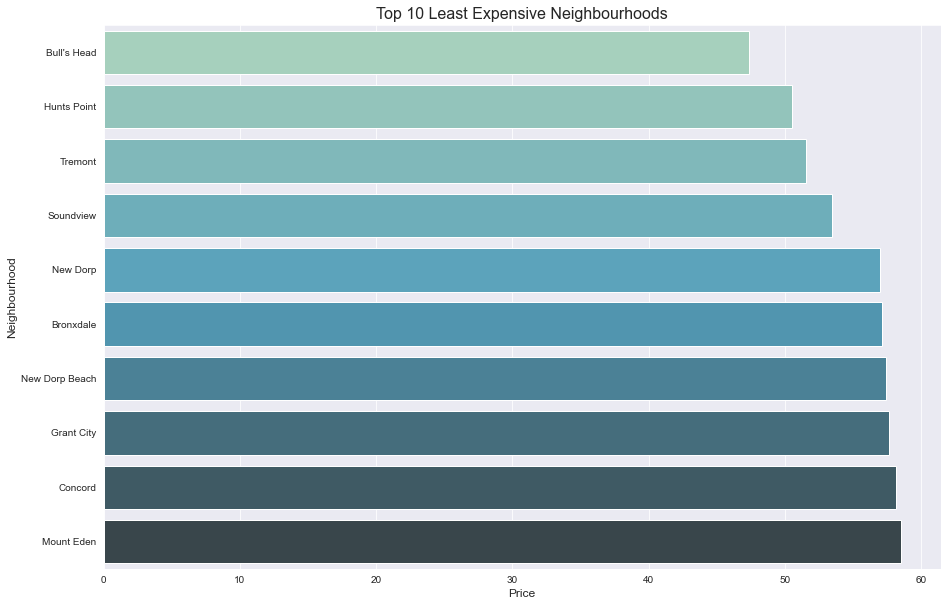

In [20]:
plt.figure(figsize = (15,10))

sns.barplot(data = nb_bottom10_price,
            orient = "h",
            x = "price",
            y = "neighbourhood",
            palette = "GnBu_d")

plt.title("Top 10 Least Expensive Neighbourhoods", fontsize = 16)
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Neighbourhood", fontsize = 12);


#### 4. What is the average Airbnb price per Room Type?

In [21]:
roomtype_price = pd.DataFrame(round(df.groupby(by = "room_type")["price"].mean(),2)).reset_index()

roomtype_price

,room_type,price
0,Entire home/apt,211.81
1,Private room,89.81
2,Shared room,70.25


Text(0, 0.5, 'Price')

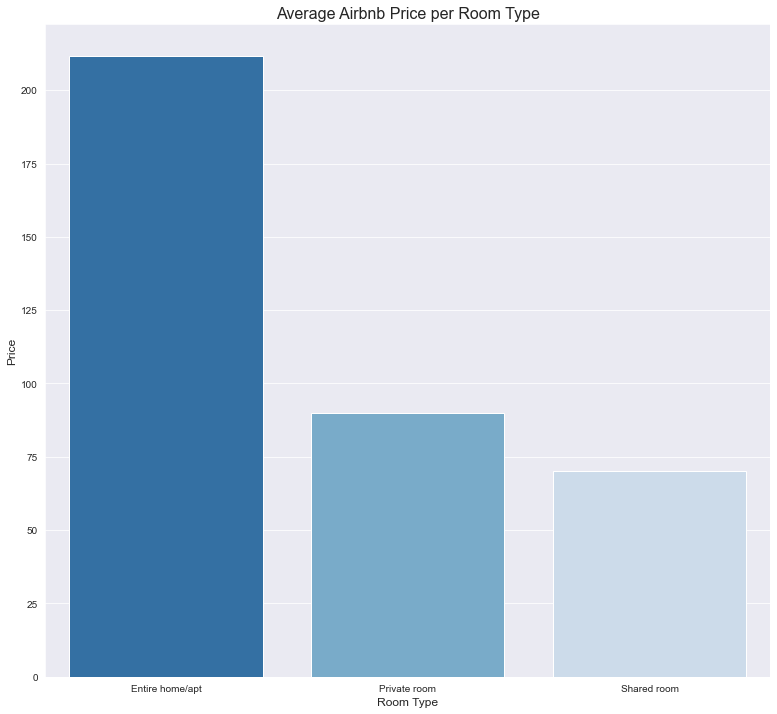

In [22]:
plt.figure(figsize = (13,12))

sns.barplot(data = roomtype_price,
            x = "room_type",
            y = "price",
            palette = "Blues_r")

plt.title("Average Airbnb Price per Room Type", fontsize = 16)
plt.xlabel("Room Type", fontsize = 12)
plt.ylabel("Price", fontsize = 12)

#### 5. Which hosts have the most listings?

In [23]:
hosts_mostlistings = pd.DataFrame(df["host_id"].value_counts().sort_values(ascending = False)[:10]).reset_index()

hosts_mostlistings.rename(columns = {"index": "host_id",
                                     "host_id": "number_of_listings"},
                         inplace = True)

In [24]:
hosts_mostlistings

,host_id,number_of_listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


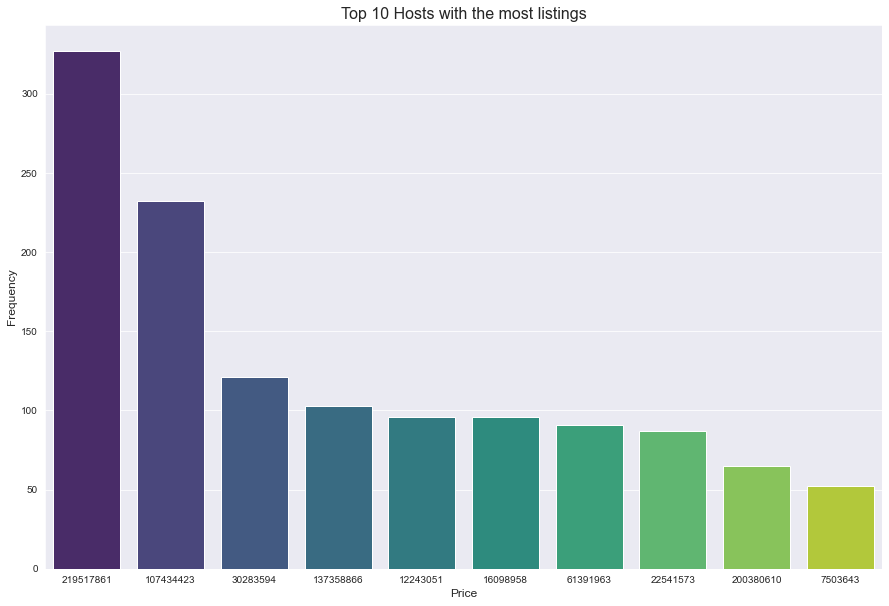

In [25]:
plt.figure(figsize = (15,10))

sns.barplot(data = hosts_mostlistings,
            x = "host_id",
            y = "number_of_listings",
            order = hosts_mostlistings.sort_values("number_of_listings", ascending = False).host_id,
            palette = "viridis")

plt.title("Top 10 Hosts with the most listings", fontsize = 16)
plt.xlabel("Price", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12);

#### 6. What is the yearly availability distribution?

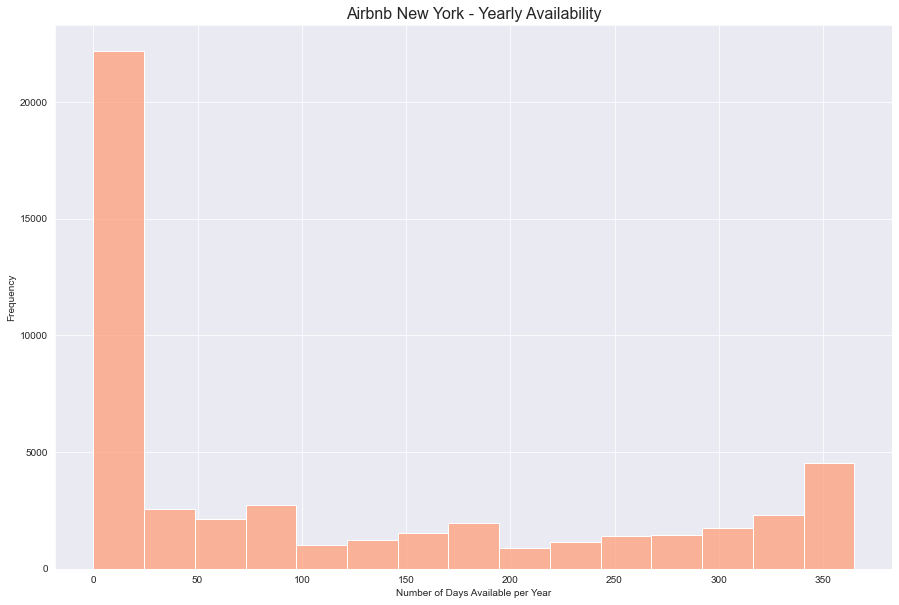

In [26]:
plt.figure(figsize = (15,10))

sns.histplot(data = df["availability_365"],
             color = "lightsalmon",
             bins = 15)

plt.title("Airbnb New York - Yearly Availability", fontsize = 16)
plt.xlabel("Number of Days Available per Year")
plt.ylabel("Frequency");

In [27]:
#Creating dataframe with Yearly Availability

yearly_availability = pd.DataFrame(df["availability_365"].value_counts().sort_values(ascending = False)).reset_index()


#Renaming columns

yearly_availability.rename(columns = {"index": "Number of Days Available per Year",
                                      "availability_365": "Number of Airbnbs"},
                          inplace = True)

yearly_availability.head()

,Number of Days Available per Year,Number of Airbnbs
0,0,17530
1,365,1295
2,364,491
3,1,408
4,89,361


#### 7. What is the "minimum nights required" distribution?

In [28]:
#Creating dataframe with Minimum nights distribution

mn_required = pd.DataFrame(df["minimum_nights"].value_counts().sort_values(ascending = False)).reset_index()


#Renaming columns

mn_required.rename(columns = {"index": "Minimum Nights Required",
                           "minimum_nights": "Amount of Airbnbs"},
                inplace = True)

mn_required.head(10)

,Minimum Nights Required,Amount of Airbnbs
0,1,12717
1,2,11693
2,3,7998
3,30,3758
4,4,3302
5,5,3033
6,7,2058
7,6,752
8,14,562
9,10,483


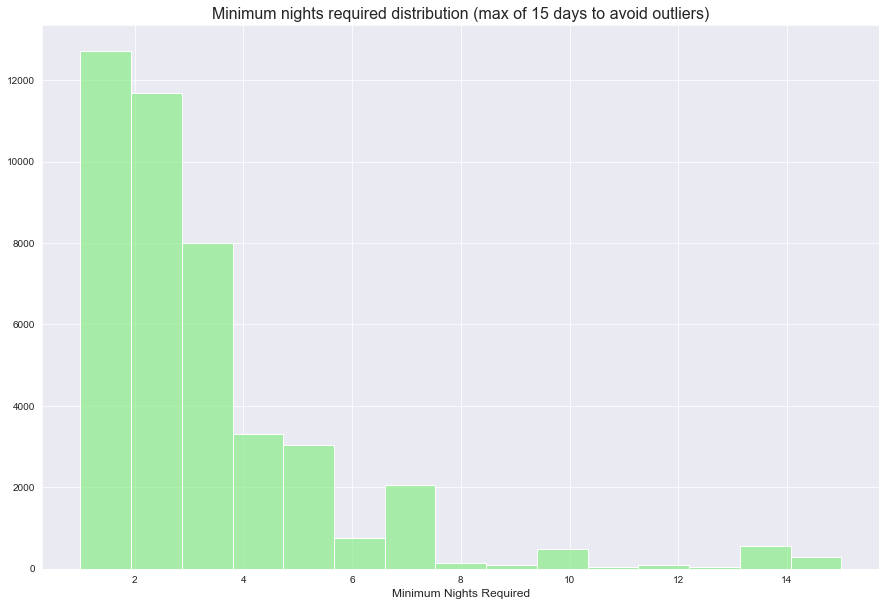

In [29]:
plt.figure(figsize = (15,10))

sns.histplot(data = df[df["minimum_nights"] <= 15],
             x = "minimum_nights",
             bins = 15,
             color = "lightgreen")

plt.title("Minimum nights required distribution (max of 15 days to avoid outliers)", fontsize = 16)
plt.xlabel("Minimum Nights Required", fontsize = 12)
plt.ylabel(None);

#### 8. Which neighbourhood groups have the most Airbnb supply? And neighbourhoods?

In [30]:
#Creating DataFrame

count_ng = pd.DataFrame(df.groupby(by = "neighbourhood_group")["id"].count().sort_values(ascending = False)).reset_index()

#Renaming columns

count_ng.rename(columns = {"neighbourhood_group": "Neighbourhood Group",
                           "id": "Number of Listings"},
                inplace = True)

count_ng

,Neighbourhood Group,Number of Listings
0,Manhattan,21660
1,Brooklyn,20095
2,Queens,5666
3,Bronx,1090
4,Staten Island,373


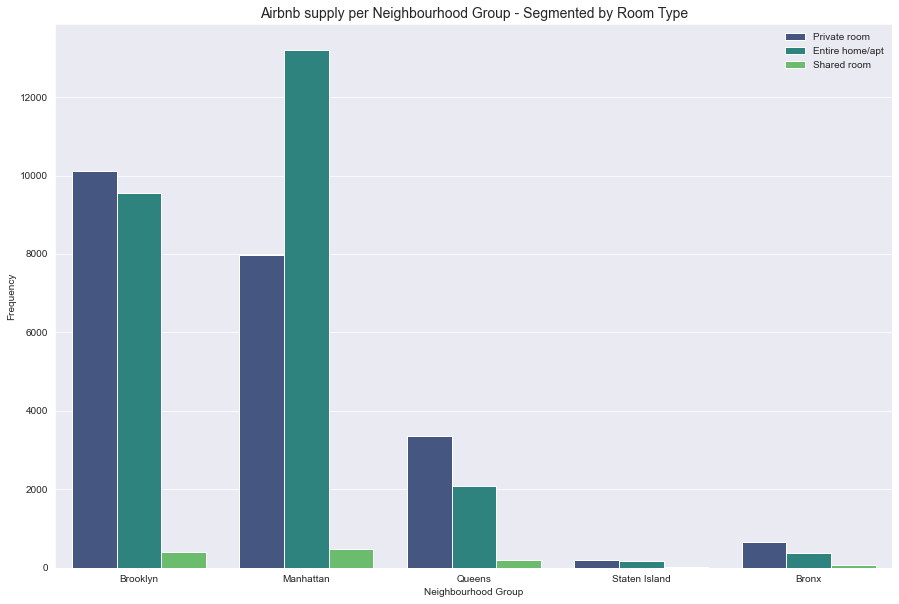

In [31]:
#Visualizing the data

plt.figure(figsize = (15,10))

sns.countplot(data = df,
              x = "neighbourhood_group",
              hue = "room_type",
              palette = "viridis")

plt.title("Airbnb supply per Neighbourhood Group - Segmented by Room Type", fontsize = 14)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Frequency")
plt.legend(frameon = False);

In [32]:
#Creating DataFrame

count_nb = pd.DataFrame(df.groupby(by = "neighbourhood")["id"].count().sort_values(ascending = False)).reset_index()

#Renaming columns

count_nb.rename(columns = {"neighbourhood": "Neighbourhood",
                           "id": "Number of Listings"},
                inplace = True)

count_nb

,Neighbourhood,Number of Listings
0,Williamsburg,3919
1,Bedford-Stuyvesant,3710
2,Harlem,2658
3,Bushwick,2462
4,Upper West Side,1971
...,...,...
216,Richmondtown,1
217,Willowbrook,1
218,Fort Wadsworth,1
219,New Dorp,1


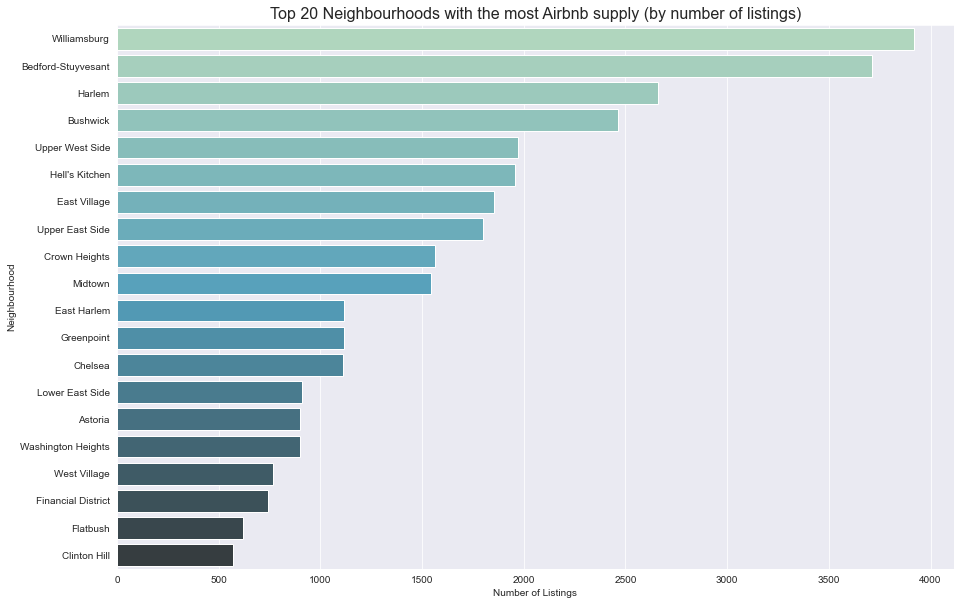

In [33]:
#Visualizing the 20 neighbourhoods with the most listings

plt.figure(figsize = (15,10))

sns.barplot(data = count_nb[:20],
            orient = "h",
            x = "Number of Listings",
            y = "Neighbourhood",
            palette = "GnBu_d")

plt.title("Top 20 Neighbourhoods with the most Airbnb supply (by number of listings)", fontsize = 16);

####  9. What are the most utilized words to describe the Airbnbs?

In [34]:
#Checking how many words are contained in the Airbnbs descriptions

text = " ".join(description for description in df["name"])

print("There are {} words in the combination of all names.".format(len(text)))

There are 1852707 words in the combination of all names.


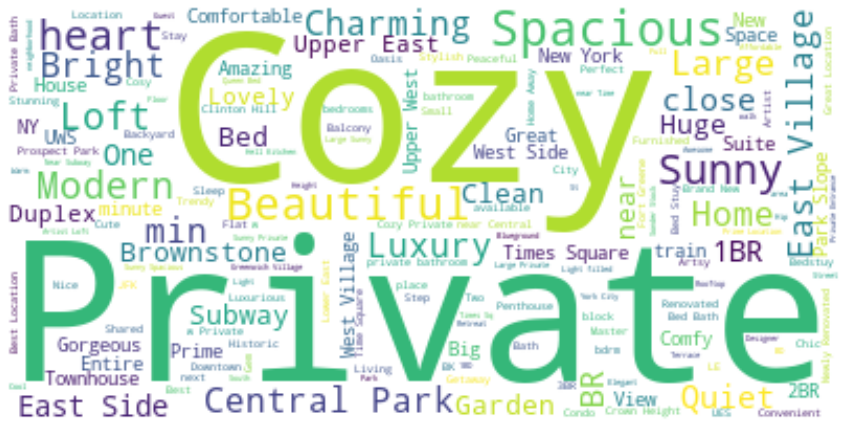

In [35]:
#Creating a StopWords list

stopwords = set(STOPWORDS)


#Integrating the neighbourhoods name and othe redudant words in the StopWords list

neighbourhood_list = df["neighbourhood"].values 

neighbourhoodgroup_list = df["neighbourhood_group"].values 

other_words = ["New York", "NYC", "Room", "Apartment", "Bedroom", "Apt", "Studio"]

stopwords.update(neighbourhood_list, neighbourhoodgroup_list, other_words)


#Generating a WordCloud image

wordcloud = WordCloud(stopwords = stopwords,
                      background_color = "white",
                      ).generate(text)

plt.figure(figsize = (15,9))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### EDA Key insights:

* The vast majority of Airbnbs are priced between 40€ to 200€.



* Manhattan is, by far, the neighbourhood group with the highest average price: almost 200€. Bronx is the lowest, with an average price of 87,58€. 



* Fort Wadsworth and Woodrow are the New York neighbourhoods with the highest average Airbnb price: 800€ and 700€, respectively. Bull's Head, Hunts Point and Tremont have the lowest average Airbnb price (close to 50€).



* As expected, the most expensive Airbnbs are the ones were you have the entire place (211€ average) as opposed to the private room (89€) and the shared room (70€).



* The minimum nights required for each stay tipically ranges from 1 (most common) to 7 days.



* Manhattan and Brooklyn are the neighbourhood groups with the highest Airbnb supply, with 21660 and 20095 listings, respectively.


* Williamsburg, Bedford-Stuyvesant and Harlem are the New York neighbourhoods with highest Airbnb supply.


* Private, Spacious, Cozy, Beautiful, Large, Sunny and Central Park are some of the most frequent mentioned words in the Airbns descriptions.

## Modelling

In [36]:
ml_df = df

In [37]:
#Dropping columns that are not not useful for machine learning purposes

ml_df.drop(columns = ["name", "id", "host_id","calculated_host_listings_count"], inplace = True)

In [38]:
ml_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


In [39]:
print("Neighbourhood Group unique values:", ml_df["neighbourhood_group"].unique())
print("\n")
print("Neighbourhood unique values:", ml_df["neighbourhood"].unique())
print("\n")
print("Room Type unique values:", ml_df["room_type"].unique())

Neighbourhood Group unique values: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


Neighbourhood unique values: ['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastcheste

In [40]:
#Turning objects into categorical variables

for label, content in ml_df.items():
    if pd.api.types.is_string_dtype(content):
        ml_df[label] = content.astype("category").cat.as_ordered()

In [41]:
#Enconding categorical variables

label_encoders = {}

categorical_columns = ["neighbourhood_group", "neighbourhood", "room_type"]  

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    ml_df[column] = label_encoders[column].fit_transform(ml_df[column])

In [42]:
#Creating X (features) & Y (target-variable)

X = ml_df.drop(columns = "price")

Y = ml_df["price"]

In [43]:
#Creating training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    random_state = 45,
                                                    test_size = 0.3)

#### Linear Regression

In [44]:
lr = LinearRegression()

lr.fit(X_train, Y_train)

lr_preds = lr.predict(X_test)

In [45]:
#Comparing Linear Regression predictions with real values

lr_error = pd.DataFrame({"Real Values": np.array(Y_test).flatten(), "Predicted values": lr_preds.flatten()})

lr_error.head(20)

,Real Values,Predicted values
0,195,130.773898
1,124,110.540624
2,50,109.689125
3,90,21.680385
4,148,213.685689
5,224,195.836226
6,139,166.463051
7,75,109.382400
8,210,245.229573
9,50,48.134710


In [46]:
#Evaluating the Linear Regression model

print("Mean Absolute Error:", mean_absolute_error(Y_test, lr_preds))

print("Mean Squared Error:", mean_squared_error(Y_test, lr_preds))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, lr_preds)))

print("R2 Score:", r2_score(Y_test, lr_preds))

Mean Absolute Error: 74.30898550703898
Mean Squared Error: 42986.39338268652
Root Mean Squared Error: 207.3316024697791
R2 Score: 0.10119499916080488


#### Random Forest Regressor

In [47]:
rfr = RandomForestRegressor()

rfr.fit(X_train, Y_train)

rfr_preds = rfr.predict(X_test)

In [48]:
#Comparing Random Forest Regressor predictions with real values

rfr_error = pd.DataFrame({"Real Values": np.array(Y_test).flatten(), "Predicted values": rfr_preds.flatten()})

rfr_error.head(20)

,Real Values,Predicted values
0,195,125.08
1,124,82.04
2,50,72.96
3,90,54.41
4,148,185.01
5,224,128.93
6,139,93.72
7,75,125.32
8,210,286.17
9,50,59.56


In [49]:
#Evaluating the Random Forest Regressor model

print("Mean Absolute Error:", mean_absolute_error(Y_test, rfr_preds))

print("Mean Squared Error:", mean_squared_error(Y_test, rfr_preds))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, rfr_preds)))

print("R2 Score:", r2_score(Y_test, rfr_preds))

Mean Absolute Error: 68.28527546706667
Mean Squared Error: 45845.48431514387
Root Mean Squared Error: 214.11558634332033
R2 Score: 0.04141410046876248


# End